In [ ]:
# treinamento
perceptron.train <- function(dados, pesos) {

    # learning rate
    n <- 0.3

    # controle
    err <- 1
    epoch <- 0
    
    cat("starting training " , nrow(dados), "\n")
    while (err == 1) {
        err <- 0
        epoch <- epoch + 1
        meanErr <- 0
        cat("\nstarting epoch \n", epoch)
        message(epoch,"\r",appendLF=FALSE)
        flush.console()
        for (i in 1:nrow(dados)) {
            #message(i,"\r",appendLF=FALSE)
            v <- 0
            
            for (j in 1:length(pesos)) {
                v <- v + dados[i,j] * pesos[j]
            }

            # funcao sinal
            y <- sign(v)
            meanErr <- meanErr + (dados[i, 4] - y) ^ 2

            # weight update
            
            if (dados[i, 4] != y) {
                err <- 1
                for (j in 1:length(pesos)) {
                    pesos[j] <- pesos[j] + n * (dados[i, 4] - y) * dados[i,j]
                }
            }
            
        }

        meanErr <- meanErr / nrow(dados)
        cat("\nErro Medio = ", meanErr)
    }
    
    cat("\nFinalizado com ", epoch, " epocas\n")
    return (pesos)
}

perceptron.teste <- function(pesos, exemplo) {
    v <- 0
    for (i in 1: length(pesos)) {
        v <- v + pesos[i] * exemplo[i]
    }
    y <- sign(v)
    return (y)
}

In [ ]:
# dados
x1 <- c(4, 2, 5, 3, 1.5, 2.5, 4, 5, 1.5, 3, 5, 4)
x2 <- c(5, 4.5, 4.5, 4, 3, 3, 3, 3, 1.5, 2, 1.5, 1)

length(x1)
bias <- rep(1, 12)
classe <- c(1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, -1)

dados <- data.frame(x1, x2, bias, classe)

In [ ]:
# pesos
pesos <- runif(3, -1, 1)
pesos <- t(pesos)
novos.pesos <- perceptron.train(dados, pesos)

In [ ]:
cores <- dados$classe
cores[cores==-1] = 2

plot(x1, x2, col=cores, pch=ifelse(dados$classe > 0, "+", "-"), cex=2, lwd=2)

intersecao <- -novos.pesos[3] / novos.pesos[2]
coef.ang <- -novos.pesos[1] / novos.pesos[2]

abline(intersecao, coef.ang, col="green")

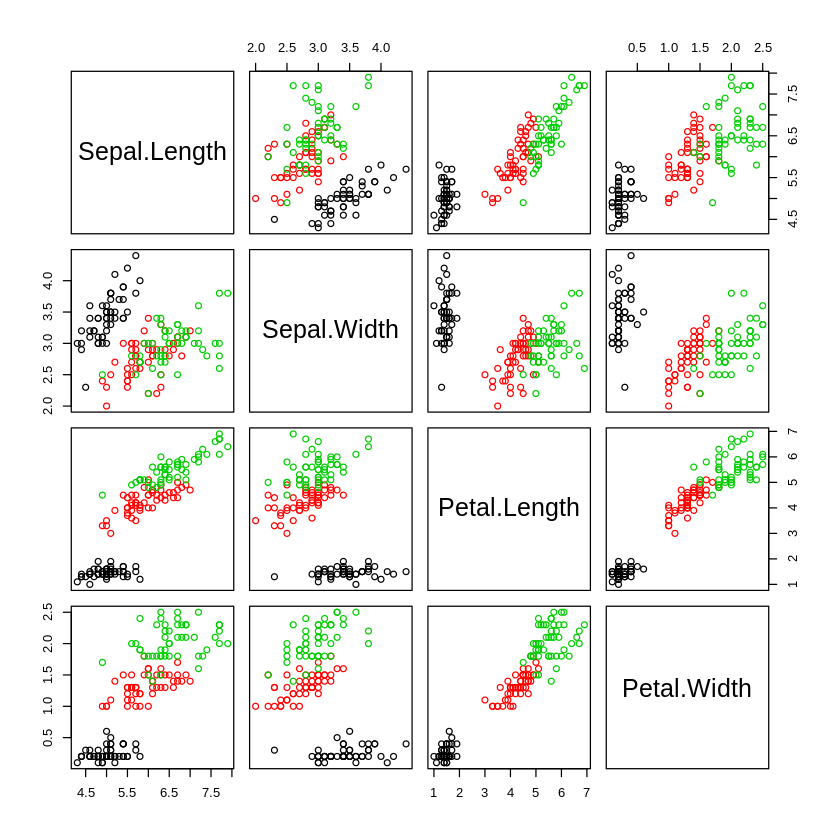

In [1]:
# Iris
pairs(iris[,1:4], col=iris$Species)

In [ ]:
x <- cbind(iris$Sepal.Width, iris$Petal.Width)
y <- ifelse(iris$Species == "setosa", +1, -1)
bias <- rep(1, 3)

dados <- data.frame(x, bias, y)

In [ ]:
# pesos
pesos <- runif(3, -1, 1)
pesos <- t(pesos)
pesos.iris <- perceptron.train(dados, pesos)

In [ ]:
#pesos.iris <- perceptron.teste(x, pesos)
#pesos.iris
coef.ang <- -pesos.iris[1] / pesos.iris[2]
intersecao <- -pesos.iris[3] / pesos.iris[2]

plot(x, cex=0.2)
points(subset(x, y==1), col="black", pch="+", cex=2)
points(subset(x, y==-1), col="red", pch="-", cex=2)

abline(intersecao, coef.ang, col="green")

In [ ]:
# dados
#x1 <- c(4, 2, 5, 3, 1.5, 2.5, 4, 5, 1.5, 3, 5, 4, 4, 2, 5, 3, 1.5, 2.5, 4, 5, 1.5, 3, 5, 4)
#x2 <- c(5, 4.5, 4.5, 4, 3, 3, 3, 3, 1.5, 2, 1.5, 1, 5, 4.5, 4.5, 4, 3, 3, 3, 3, 1.5, 2, 1.5, 1)
x1 <- c(4, 2, 5, 3, 1.5, 2.5, 4, 5, 1.5, 3, 5, 4, #4)
x2 <- c(5, 4.5, 4.5, 4, 3, 3, 3, 3, 1.5, 2, 1.5, 1, #5)

bias <- rep(1, length(x1))
classe <- c(1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, -1, #-1)

dados <- data.frame(x1, x2, bias, classe)

pesos <- runif(3, -1, 1)
pesos <- t(pesos)

novos.pesos <- perceptron.train(dados, pesos)

# cores <- dados$classe
# cores[cores==-1] = 2

# plot(x1, x2, col=cores, pch=ifelse(dados$classe > 0, "+", "-"), cex=2, lwd=2)

# intersecao <- -novos.pesos[3] / novos.pesos[2]
# coef.ang <- -novos.pesos[1] / novos.pesos[2]

# abline(intersecao, coef.ang, col="green")